<a href="https://colab.research.google.com/github/varunkumarprabhakar/myprojects/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('/content/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def crate(val):
  val=str(val).split('/')
  value=val[0]
  return float(value)

df['rate']=df['rate'].apply(crate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## **1. What type of restaurant do the majority of customers order from?**

Text(0.5, 0, 'type of restaurants')

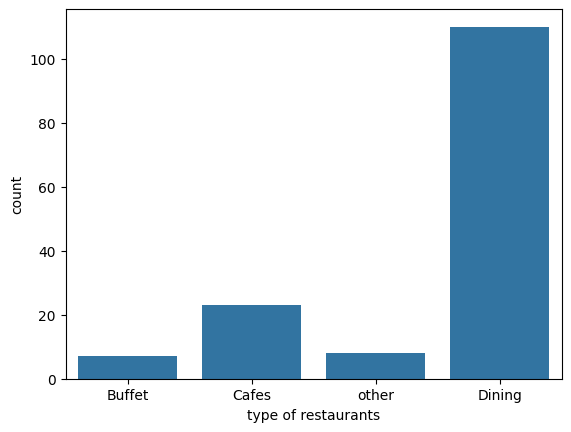

In [10]:
restty=sb.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurants')


conclusion- Dining restautants gets more orders compare to other restaurants.

**2. How many votes has each type of restaurant received from customers?**

Text(0.5, 1.0, 'votes vs restaurants')

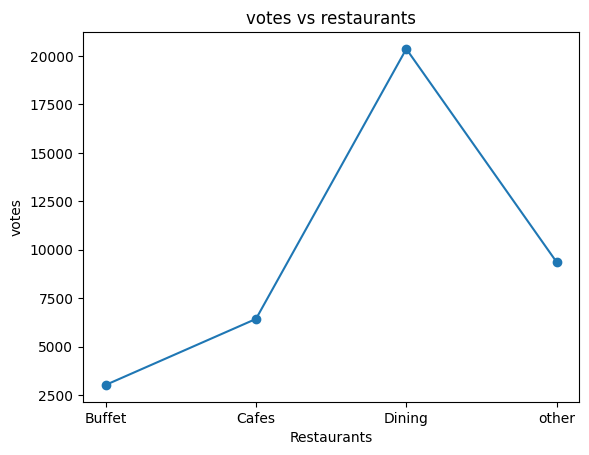

In [50]:
df2=df.groupby(['listed_in(type)'])['votes'].sum()
result=pd.DataFrame({'votes':df2})
plt.plot(result,marker='o')
plt.xlabel('Restaurants')
plt.ylabel('votes')
plt.title('votes vs restaurants')

**3) What are the ratings that the majority of restaurants have received?**

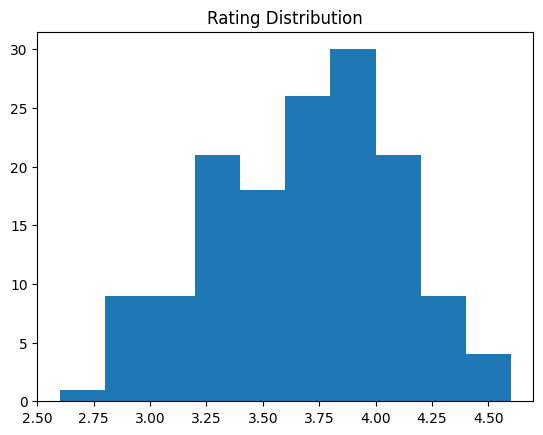

In [31]:
plt.hist(df['rate'],bins=10)
plt.title("Rating Distribution")
plt.show()

conclusion- The majority of restaurants received ratings ranging from 3.5 to 4.

**4)Zomato has observed that most couples order most of their food online. What is their
average spending on each order?**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

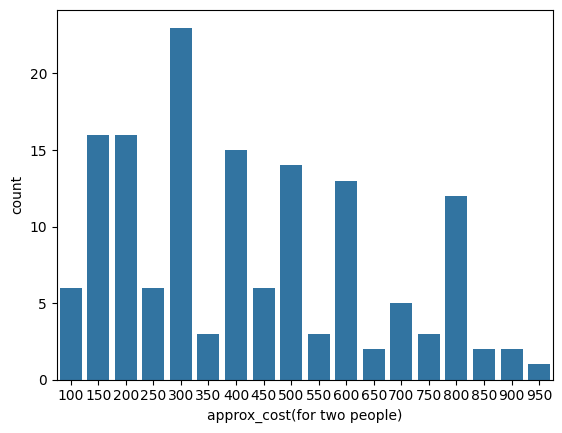

In [34]:
coupda=df['approx_cost(for two people)']
sb.countplot(x=coupda)

conclusion- The majority of the couples prefer the restaurants with an apprx 300 rupees.

**5) Which mode (online or offline) has received the maximum rating?**

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

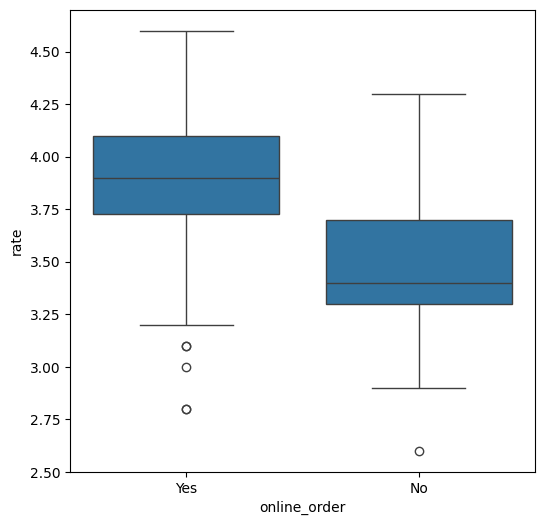

In [36]:
plt.figure(figsize=(6,6))
sb.boxplot(x='online_order',y='rate',data=df)

conclusion- offline orders recived lower rating then online orders

**6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?**

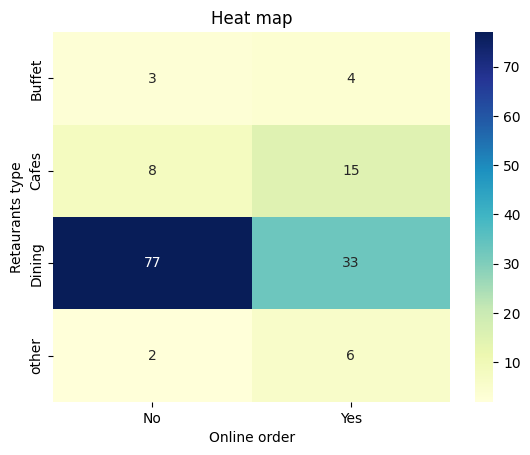

In [49]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sb.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heat map')
plt.xlabel('Online order')
plt.ylabel('Retaurants type')
plt.show()

conclusion- Dining restaurants primarily accepts offline orders, whereas cafes primarily receive online orders.
This suggest that clients prefer to place order in preson at restaurants, but prefer online ordering at cafe.